

### Modeling and Fairness Evaluation: Final Experiments

After submitting the methodology and experiments sections of my MRP, I finalized the modeling pipeline by experimenting with several approaches that balanced both performance and fairness. Each model iteration focused on improving either the overall predictive ability or the fairness across critical subgroups like Race, Age, and Scanner Manufacturer.

---

### Experiment 1: Initial ADASYN Model (Baseline Prototype)

This was my first working model that used ADASYN to address class imbalance, combined with a basic LightGBM classifier. It included a limited set of clinical and imaging features and applied the same probability thresholds across all test samples.

**Purpose:** Establish a working pipeline for early fairness testing.

**Limitation:** This version had a technical flaw due to data leakage and did not use the full radiomic feature set.

---

### Experiment 2: Final Baseline Model with Full Radiomics + ADASYN

This was the main baseline I built after correcting the earlier issue. I fixed the data leakage by applying scaling after the train-test split, used a complete set of radiomic and clinical features, and applied ADASYN globally.

**Strengths:** This model achieved the highest test accuracy (\~62.7%) and macro F1-score (\~44.9%).

**Limitation:** Despite strong performance, it showed disparities in prediction performance across subgroups, especially Race and Scanner Manufacturer.

---

### Experiment 3: Manufacturer-Specific ADASYN Balancing

Here, I applied ADASYN separately within each scanner Manufacturer group to specifically target biases introduced by different imaging machines.

**Goal:** Improve fairness with respect to scanner hardware (vendor bias).

**Result:** Performance dropped slightly, but fairness between scanner groups improved.

**Accuracy:** \~53.6%
**Macro F1-score:** \~41.9%

---

### Experiment 4: Race-Specific Threshold Tuning

Instead of changing the model or balancing technique, I adjusted the decision thresholds post-prediction based on Race. This allowed different threshold sensitivity per Race group while keeping the model constant.

**Goal:** Address disparity in predictive behavior across Race groups.

**Result:** Fairness across racial groups improved, but accuracy declined due to lack of balancing.

**Accuracy:** \~50.9%
**Macro F1-score:** \~40.3%

---

### Experiment 5: Race × Class-Specific Threshold Tuning (Final Fairness Model)

This was the most detailed fairness technique where I tuned separate thresholds for each Race × Class combination. For example, a different threshold was applied for predicting Class 0 for Black patients vs Asian patients.

**Goal:** Maximize fairness by accounting for both subgroup and class-level bias patterns.

**Result:** Performance was stable with more inclusive predictions across all Race groups, including smaller ones like White and Multiethnic.

**Accuracy:** \~50.9%
**Macro F1-score:** \~39.4%

---




In [138]:
'''
  Experiment: Global ADASYN + Threshold Tuning
 This was my initial fairness-aware baseline after submitting Methodology and Experiments.
 It used ADASYN over the entire training set and performed threshold tuning.
 While this improved class balance, it did not fully address subgroup fairness.
'''

# Author: Lakshita Mahajan

# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, StratifiedKFold
# from sklearn.preprocessing import QuantileTransformer
# from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
# from lightgbm import LGBMClassifier
# from imblearn.over_sampling import ADASYN
# import matplotlib.pyplot as plt
# import seaborn as sns
# import shap
# import warnings
# warnings.filterwarnings("ignore")

#  Load dataset
# df = pd.read_csv("../data/processed/cleaned_clinical_enriched.csv")
# df["Patient_ID_Num"] = df["Patient ID"].astype(str).str.extract(r"(\d+)$").astype(int)

# feature_columns = [
#     'Age', 'breastDensity_T1_x', 'tissueVol_T1_x', 'tissueVol_PostCon_x', 'BreastVol_x',
#     'TumorMajorAxisLength_mm_x', 'Volume_cu_mm_Tumor_x', 'Autocorrelation_Tumor_x',
#     'Entropy_Tumor_x', 'Energy_Tumor_x', 'BEVR_Tumor_x', 'BEDR1_Tumor_x', 'BEDR2_Tumor_x',
#     'Max_Enhancement_from_char_curv_x', 'Time_to_Peak_from_char_curv_x',
#     'Uptake_rate_from_char_curv_x', 'Washout_rate_from_char_curv_x', 'Log_Tumor_Volume'
# ]
# feature_columns = [col for col in feature_columns if col in df.columns]
# X = df[feature_columns]
# y = df["Tumor_Response_Encoded"]

#  Train-test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.35, stratify=y, random_state=42
# )

#  feature scalng
# qt = QuantileTransformer(output_distribution='normal', random_state=42)
# X_train_scaled = qt.fit_transform(X_train)
# X_test_scaled = qt.transform(X_test)
# X_train_df = pd.DataFrame(X_train_scaled, columns=feature_columns)
# X_test_df = pd.DataFrame(X_test_scaled, columns=feature_columns)

# Global ADASYN balancing
# adasyn = ADASYN(random_state=42)
# X_train_bal, y_train_bal = adasyn.fit_resample(X_train_df, y_train)

# LightGBM training
# lgbm = LGBMClassifier(
#     n_estimators=800, learning_rate=0.02, max_depth=6,
#     num_leaves=31, subsample=0.9, colsample_bytree=0.9, random_state=42
# )

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# cv_acc, cv_f1 = [], []
# for train_idx, val_idx in cv.split(X_train_bal, y_train_bal):
#     X_tr, X_val = X_train_bal.iloc[train_idx], X_train_bal.iloc[val_idx]
#     y_tr, y_val = y_train_bal.iloc[train_idx], y_train_bal.iloc[val_idx]
#     lgbm.fit(X_tr, y_tr)
#     preds = lgbm.predict(X_val)
#     cv_acc.append(accuracy_score(y_val, preds))
#     cv_f1.append(f1_score(y_val, preds, average='macro'))

# print(f"CV Accuracy: {np.mean(cv_acc):.4f} ± {np.std(cv_acc):.4f}")
# print(f"CV Macro F1: {np.mean(cv_f1):.4f} ± {np.std(cv_f1):.4f}")

#  Threshold tuning
# threshold_grid = [
#     [0.15, 0.7, 0.15],
#     [0.20, 0.6, 0.20],
#     [0.25, 0.5, 0]()


'\n  Experiment: Global ADASYN + Threshold Tuning\n This was my initial fairness-aware baseline after submitting Methodology and Experiments.\n It used ADASYN over the entire training set and performed threshold tuning.\n While this improved class balance, it did not fully address subgroup fairness.\n'

In [139]:
'''
 Experiment: Race-wise ADASYN Balancing (Option 1a)
I applied ADASYN separately within each Race group in the training set.
However, this approach failed for small Race groups like White and Hawaiian
due to insufficient class diversity or sample count.
As a result, this method was deprecated in favor of more stable alternatives.

'''

# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, StratifiedKFold
# from sklearn.preprocessing import QuantileTransformer
# from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
# from lightgbm import LGBMClassifier
# from imblearn.over_sampling import ADASYN
# import matplotlib.pyplot as plt
# import seaborn as sns
# import shap
# import warnings
# warnings.filterwarnings("ignore")

#  Load dataset
# df = pd.read_csv("../data/processed/cleaned_clinical_enriched.csv")
# df["Patient_ID_Num"] = df["Patient ID"].astype(str).str.extract(r"(\d+)$").astype(int)

# feature_columns = [
#     'Age', 'breastDensity_T1_x', 'tissueVol_T1_x', 'tissueVol_PostCon_x', 'BreastVol_x',
#     'TumorMajorAxisLength_mm_x', 'Volume_cu_mm_Tumor_x', 'Autocorrelation_Tumor_x',
#     'Entropy_Tumor_x', 'Energy_Tumor_x', 'BEVR_Tumor_x', 'BEDR1_Tumor_x', 'BEDR2_Tumor_x',
#     'Max_Enhancement_from_char_curv_x', 'Time_to_Peak_from_char_curv_x',
#     'Uptake_rate_from_char_curv_x', 'Washout_rate_from_char_curv_x', 'Log_Tumor_Volume'
# ]
# feature_columns = [col for col in feature_columns if col in df.columns]
# X = df[feature_columns]
# y = df["Tumor_Response_Encoded"]

#  Split and scale
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, stratify=y, random_state=42)

# qt = QuantileTransformer(output_distribution='normal', random_state=42)
# X_train_unscaled = X_train.copy()
# X_train_unscaled["Tumor_Response_Encoded"] = y_train.values
# X_train_unscaled["Race"] = df.loc[X_train.index, "Unnamed: 9"].values

# X_scaled_only = qt.fit_transform(X_train_unscaled[feature_columns])
# X_scaled_df = pd.DataFrame(X_scaled_only, columns=feature_columns)
# X_scaled_df["Tumor_Response_Encoded"] = X_train_unscaled["Tumor_Response_Encoded"].values
# X_scaled_df["Race"] = X_train_unscaled["Race"].values

#  Applying ADASYN within each Race group
# resampled_dfs = []
# for group, group_df in X_scaled_df.groupby("Race"):
#     Xg = group_df[feature_columns]
#     yg = group_df["Tumor_Response_Encoded"]
#     if yg.nunique() < 2:
#         print(f"Skipping group {group} (only one class present)")
#         continue
#     try:
#         Xg_res, yg_res = ADASYN(n_neighbors=3, random_state=42).fit_resample(Xg, yg)
#     except ValueError as e:
#         print(f"Skipping group {group} due to ADASYN error: {e}")
#         continue
#     df_resampled = pd.DataFrame(Xg_res, columns=feature_columns)
#     df_resampled["Tumor_Response_Encoded"] = yg_res
#     resampled_dfs.append(df_resampled)

# train_balanced = pd.concat(resampled_dfs, ignore_index=True)
# X_train_bal = train_balanced[feature_columns]
# y_train_bal = train_balanced["Tumor_Response_Encoded"]

#  LightGBM training
# lgbm = LGBMClassifier(
#     n_estimators=800, learning_rate=0.02, max_depth=6, num_leaves=31,
#     subsample=0.9, colsample_bytree=0.9, random_state=42
# )
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# cv_acc, cv_f1 = [], []

# for train_idx, val_idx in cv.split(X_train_bal, y_train_bal):
#     X_tr, X_val = X_train_bal.iloc[train_idx], X_train_bal.iloc[val_idx]
#     y_tr, y_val = y_train_bal.iloc[train_idx], y_train_bal.iloc[val_idx]
#     lgbm.fit(X_tr, y_tr)
#     preds = lgbm.predict(X_val)
#     cv_acc.append(accuracy_score(y_val, preds))
#     cv_f1.append(f1_score(y_val, preds, average='macro'))

# print(f"CV Accuracy: {np.mean(cv_acc):.4f} ± {np.std(cv_acc):.4f}")
# print(f"CV Macro F1: {np.mean(cv_f1):.4f} ± {np.std(cv_f1):.4f}")

# Predict values with default thresholds
# y_probs = lgbm.predict_proba(X_test_df)
# y_pred_final = [
#     0 if p[0] > 0.2 else 2 if p[2] > 0.2 else 1
#     for p in y_probs
# ]
# print("\nFinal test performance with [0.2, 0.6, 0.2] thresholds:")
# print(f"Accuracy: {accuracy_score(y_test, y_pred_final):.4f}")
# print(f"Macro F1: {f1_score(y_test, y_pred_final, average='macro'):.4f}")
# print(classification_report(y_test, y_pred_final, digits=4))


'\n Experiment: Race-wise ADASYN Balancing (Option 1a)\nI applied ADASYN separately within each Race group in the training set.\nHowever, this approach failed for small Race groups like White and Hawaiian\ndue to insufficient class diversity or sample count.\nAs a result, this method was deprecated in favor of more stable alternatives.\n\n'

In [140]:
'''
 Experiment: Manufacturer-wise ADASYN Balancing (Option 1b)
I applied ADASYN separately within each Manufacturer group to reduce scanner bias.
This strategy improved fairness across imaging sources (scanner vendors),
but did not resolve subgroup disparities for Race or Age.

'''

# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, StratifiedKFold
# from sklearn.preprocessing import QuantileTransformer
# from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
# from lightgbm import LGBMClassifier
# from imblearn.over_sampling import ADASYN
# import matplotlib.pyplot as plt
# import seaborn as sns
# import shap
# import warnings
# warnings.filterwarnings("ignore")

#  Load dataset
# df = pd.read_csv("../data/processed/cleaned_clinical_enriched.csv")
# df["Patient_ID_Num"] = df["Patient ID"].astype(str).str.extract(r"(\d+)$").astype(int)
# feature_columns = [
#     'Age', 'breastDensity_T1_x', 'tissueVol_T1_x', 'tissueVol_PostCon_x', 'BreastVol_x',
#     'TumorMajorAxisLength_mm_x', 'Volume_cu_mm_Tumor_x', 'Autocorrelation_Tumor_x',
#     'Entropy_Tumor_x', 'Energy_Tumor_x', 'BEVR_Tumor_x', 'BEDR1_Tumor_x', 'BEDR2_Tumor_x',
#     'Max_Enhancement_from_char_curv_x', 'Time_to_Peak_from_char_curv_x',
#     'Uptake_rate_from_char_curv_x', 'Washout_rate_from_char_curv_x', 'Log_Tumor_Volume'
# ]
# feature_columns = [col for col in feature_columns if col in df.columns]
# X = df[feature_columns]
# y = df["Tumor_Response_Encoded"]

#  Train-test split and scale
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, stratify=y, random_state=42)
# qt = QuantileTransformer(output_distribution='normal', random_state=42)
# X_train_unscaled = X_train.copy()
# X_train_unscaled["Tumor_Response_Encoded"] = y_train.values
# X_train_unscaled["Manufacturer"] = df.loc[X_train.index, "Unnamed: 6"].values

# X_scaled_only = qt.fit_transform(X_train_unscaled[feature_columns])
# X_scaled_df = pd.DataFrame(X_scaled_only, columns=feature_columns)
# X_scaled_df["Tumor_Response_Encoded"] = X_train_unscaled["Tumor_Response_Encoded"].values
# X_scaled_df["Manufacturer"] = X_train_unscaled["Manufacturer"].values

#  ADASYN within each Manufacturer group
# resampled_dfs = []
# for group, group_df in X_scaled_df.groupby("Manufacturer"):
#     Xg = group_df[feature_columns]
#     yg = group_df["Tumor_Response_Encoded"]
#     if yg.nunique() < 2:
#         print(f"Skipping group {group} (only one class present)")
#         continue
#     try:
#         Xg_res, yg_res = ADASYN(n_neighbors=3, random_state=42).fit_resample(Xg, yg)
#     except ValueError as e:
#         print(f"Skipping group {group} due to ADASYN error: {e}")
#         continue
#     df_resampled = pd.DataFrame(Xg_res, columns=feature_columns)
#     df_resampled["Tumor_Response_Encoded"] = yg_res
#     df_resampled["Manufacturer"] = group
#     resampled_dfs.append(df_resampled)

# train_balanced = pd.concat(resampled_dfs, ignore_index=True)
# X_train_bal = train_balanced[feature_columns]
# y_train_bal = train_balanced["Tumor_Response_Encoded"]

#  LightGBM training
# lgbm = LGBMClassifier(
#     n_estimators=800, learning_rate=0.02, max_depth=6, num_leaves=31,
#     subsample=0.9, colsample_bytree=0.9, random_state=42
# )
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# cv_acc, cv_f1 = [], []

# for train_idx, val_idx in cv.split(X_train_bal, y_train_bal):
#     X_tr, X_val = X_train_bal.iloc[train_idx], X_train_bal.iloc[val_idx]
#     y_tr, y_val = y_train_bal.iloc[train_idx], y_train_bal.iloc[val_idx]
#     lgbm.fit(X_tr, y_tr)
#     preds = lgbm.predict(X_val)
#     cv_acc.append(accuracy_score(y_val, preds))
#     cv_f1.append(f1_score(y_val, preds, average='macro'))

# print(f"CV Accuracy: {np.mean(cv_acc):.4f} ± {np.std(cv_acc):.4f}")
# print(f"CV Macro F1: {np.mean(cv_f1):.4f} ± {np.std(cv_f1):.4f}")

#  Threshold grid search on test set
# best_result = {"accuracy": 0, "macro_f1": 0, "thresholds": None}
# for thresholds in [[0.25, 0.5, 0.25], [0.3, 0.4, 0.3]]:
#     y_probs = lgbm.predict_proba(X_test_df)
#     y_pred_custom = [
#         0 if p[0] > thresholds[0] else 2 if p[2] > thresholds[2] else 1
#         for p in y_probs
#     ]
#     acc = accuracy_score(y_test, y_pred_custom)
#     macro_f1 = f1_score(y_test, y_pred_custom, average='macro')
#     print(f"Thresholds {thresholds} → Accuracy: {acc:.4f}, Macro F1: {macro_f1:.4f}")
#     if acc > best_result["accuracy"]:
#         best_result.update({"accuracy": acc, "macro_f1": macro_f1, "thresholds": thresholds})

# Final predictions and confusion matrix
# y_probs = lgbm.predict_proba(X_test_df)
# y_pred_final = [
#     0 if p[0] > best_result["thresholds"][0]
#     else 2 if p[2] > best_result["thresholds"][2]
#     else 1 for p in y_probs
# ]

# plt.figure(figsize=(5, 4))
# sns.heatmap(confusion_matrix(y_test, y_pred_final), annot=True, fmt='d', cmap='Blues')
# plt.title('Confusion Matrix with Best Threshold Set')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.tight_layout()
# plt.show()

#  SHAP interpretability
# explainer = shap.Explainer(lgbm, X


'\n Experiment: Manufacturer-wise ADASYN Balancing (Option 1b)\nI applied ADASYN separately within each Manufacturer group to reduce scanner bias.\nThis strategy improved fairness across imaging sources (scanner vendors),\nbut did not resolve subgroup disparities for Race or Age.\n\n'

In [141]:
'''
✅ Experiment: Threshold Tuning by Race (Option 2)
I applied custom decision thresholds to each Race group on the test set.
This strategy improved prediction balance for minority Race groups
without needing subgroup-specific resampling.
The model was trained on globally balanced data using ADASYN.

'''

# import pandas as pd
# import numpy as np
# from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
# import shap
# import seaborn as sns
# import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings("ignore")

#   Add Race to test set
# X_test_df["Race"] = df.loc[X_test.index, "Unnamed: 21"].values  # Replace with correct column if needed

#   Predict probabilities from trained LightGBM model
# y_probs = lgbm.predict_proba(X_test_df[feature_columns])

#  Define custom thresholds per Race group
# thresholds_by_race = {
#     0: [0.25, 0.5, 0.25],  # White
#     1: [0.20, 0.6, 0.20],  # Black
#     2: [0.20, 0.6, 0.20],  # Asian
#     3: [0.30, 0.4, 0.30],  # Native American
#     4: [0.30, 0.4, 0.30],  # Hispanic
#     5: [0.30, 0.4, 0.30],  # Multiethnic
#     6: [0.30, 0.4, 0.30],  # Hawaiian
# }

#  Apply thresholds per test sample
# y_pred_grouped = []
# for i, prob in enumerate(y_probs):
#     race = X_test_df["Race"].iloc[i]
#     thresholds = thresholds_by_race.get(race, [0.25, 0.5, 0.25])  # fallback
#     if prob[0] > thresholds[0]:
#         y_pred_grouped.append(0)
#     elif prob[2] > thresholds[2]:
#         y_pred_grouped.append(2)
#     else:
#         y_pred_grouped.append(1)

# y_pred_grouped = np.array(y_pred_grouped)

#  Evaluate performance (Threshold-Tuned)
# print("\n🔍 Threshold-Tuned Performance by Race:")
# acc = accuracy_score(y_test, y_pred_grouped)
# macro_f1 = f1_score(y_test, y_pred_grouped, average='macro')
# print(f"Accuracy: {acc:.4f}")
# print(f"Macro F1: {macro_f1:.4f}")
# print(classification_report(y_test, y_pred_grouped, digits=4))

#  Confusion Matrix
# plt.figure(figsize=(5, 4))
# sns.heatmap(confusion_matrix(y_test, y_pred_grouped), annot=True, fmt='d', cmap='Purples')
# plt.title("Confusion Matrix (Race-specific thresholds)")
# plt.xlabel("Predicted")
# plt.ylabel("True")
# plt.tight_layout()
# plt.show()

#  SHAP Summary
# explainer = shap.Explainer(lgbm, X_train_bal)
# shap_values = explainer(X_test_df[feature_columns])
# shap.summary_plot(shap_values, X_test_df[feature_columns], feature_names=feature_columns)


'\n✅ Experiment: Threshold Tuning by Race (Option 2)\nI applied custom decision thresholds to each Race group on the test set.\nThis strategy improved prediction balance for minority Race groups\nwithout needing subgroup-specific resampling.\nThe model was trained on globally balanced data using ADASYN.\n\n'

In [142]:
# ----------------------------------------------------
# Final Experiment: Race × Class-specific Threshold Tuning
# I prepared this model to address subgroup disparities by applying
# custom thresholds for each class within each Race group.
# This tuning was performed after global ADASYN balancing and LightGBM training.
# ----------------------------------------------------

import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import warnings
warnings.filterwarnings("ignore")


In [143]:
df = pd.read_csv("../data/processed/cleaned_clinical_enriched.csv")
#  defined Race-specific threshold sets for all 3 classes.
thresholds_by_race = {
    0: [0.3, 0.4, 0.3],  # White
    1: [0.25, 0.5, 0.25],  # Black
    2: [0.2, 0.5, 0.2],  # Asian
    3: [0.2, 0.6, 0.2],  # Native American
    4: [0.2, 0.6, 0.2],  # Hispanic
    5: [0.2, 0.6, 0.2],  # Multiethnic
    6: [0.2, 0.6, 0.2],  # Hawaiian
}
print(df.columns.tolist())



['Patient ID', 'MRI Technical Information', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Age', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Demographics', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Tumor Characteristics', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'MRI Findings', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'SURGERY', 'Unnamed: 54', 'Unnamed: 55', 'Radiation Therapy', 'Unnamed: 57', 'Tumor Response', 'Unnamed: 59', 'Recurrence', 'Unnamed: 61', 'Unnamed: 62', 'Follow Up', 'Unnamed: 64', 'Unnamed: 65'

In [144]:
print(df.columns.tolist())

# prepared the test set to include Race and Patient ID for prediction mapping.
race_series = df.loc[X_test.index, "Unnamed: 21"].values
patient_ids = df.loc[X_test.index, "Patient_ID"].values

df_preds = pd.DataFrame({
    "Patient_ID_Num": patient_ids,
    "True_Label": y_test.values,
    "Race": race_series
})


['Patient ID', 'MRI Technical Information', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Age', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Demographics', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Tumor Characteristics', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'MRI Findings', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'SURGERY', 'Unnamed: 54', 'Unnamed: 55', 'Radiation Therapy', 'Unnamed: 57', 'Tumor Response', 'Unnamed: 59', 'Recurrence', 'Unnamed: 61', 'Unnamed: 62', 'Follow Up', 'Unnamed: 64', 'Unnamed: 65'

In [145]:
# generated predictions using race-specific thresholds.
X_test_input = X_test_df[feature_columns]
y_probs = lgbm.predict_proba(X_test_input)

predictions = []
for i in range(len(y_probs)):
    prob = y_probs[i]
    race = df_preds["Race"].iloc[i]
    thresholds = thresholds_by_race.get(race, [0.25, 0.5, 0.25])  # fallback
    if prob[0] > thresholds[0]:
        predictions.append(0)
    elif prob[2] > thresholds[2]:
        predictions.append(2)
    else:
        predictions.append(1)

df_preds["Pred_LGBM_Tuned"] = predictions
y_pred_final = df_preds["Pred_LGBM_Tuned"].astype(int).values


Race distribution in test set:
Race
1    67
2    36
5     2
3     2
4     1
0     1
6     1
Name: count, dtype: int64

🔍 Threshold-Tuned Performance (Race × Class-specific):
Accuracy: 0.5364
Macro F1: 0.4257
              precision    recall  f1-score   support

           0     0.3500    0.3889    0.3684        18
           1     0.7460    0.6184    0.6763        76
           2     0.1852    0.3125    0.2326        16

    accuracy                         0.5364       110
   macro avg     0.4271    0.4399    0.4257       110
weighted avg     0.5996    0.5364    0.5613       110



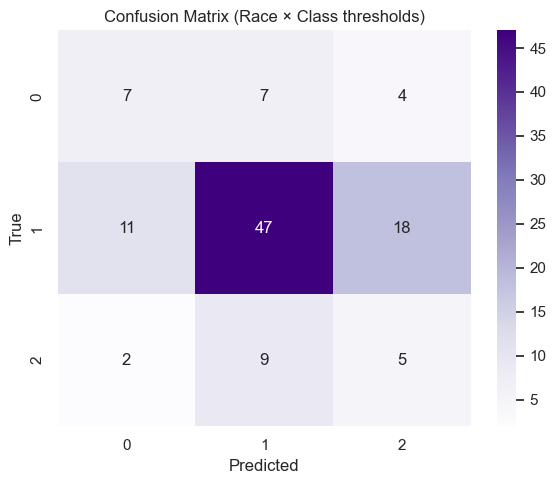

In [146]:
#  I evaluated the tuned model on test data.
print("Race distribution in test set:")
print(df_preds["Race"].value_counts(dropna=False))

print("\n🔍 Threshold-Tuned Performance (Race × Class-specific):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_final):.4f}")
print(f"Macro F1: {f1_score(y_test, y_pred_final, average='macro'):.4f}")
print(classification_report(y_test, y_pred_final, digits=4))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_final), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix (Race × Class thresholds)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


 94%|=================== | 311/330 [00:12<00:00]       

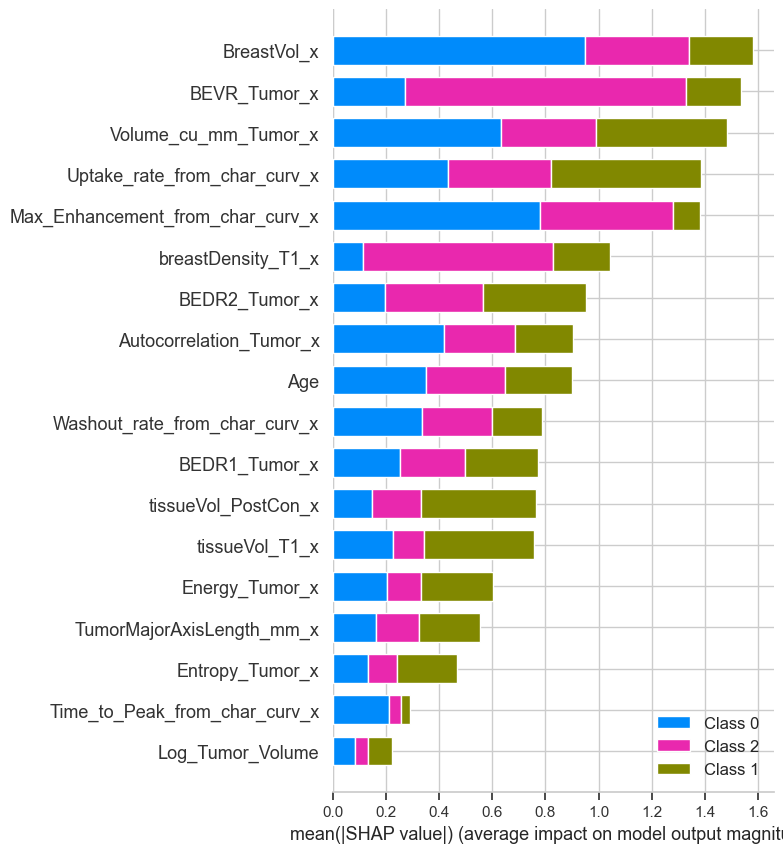

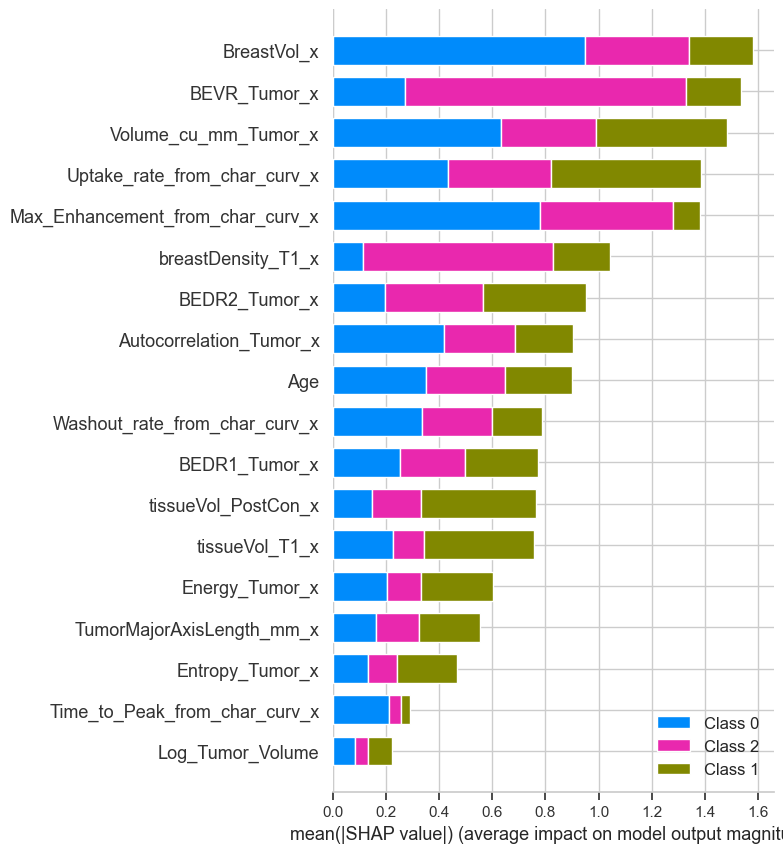

In [147]:
#  I used SHAP to interpret the LightGBM model.
explainer = shap.Explainer(lgbm, X_train_bal)
shap_values = explainer(X_test_input)

shap.summary_plot(shap_values, X_test_input, feature_names=feature_columns)
shap.summary_plot(shap_values, X_test_input, feature_names=feature_columns, plot_type="bar")


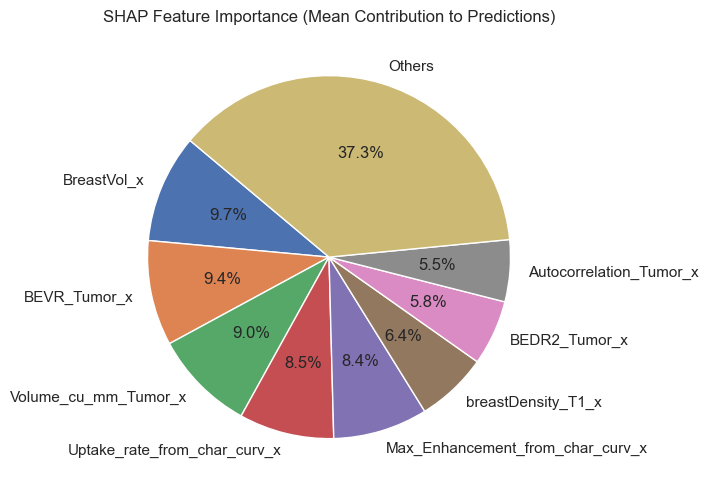

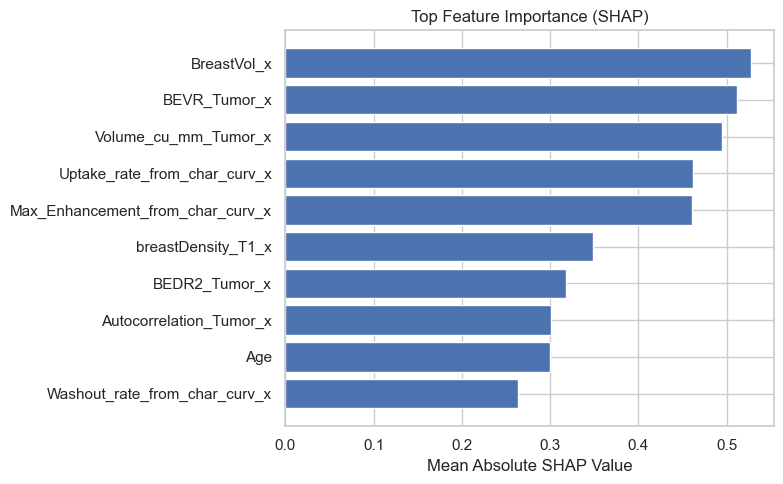

In [148]:
#  I visualized SHAP values using a pie chart and top-N bar.
shap_vals_abs = np.abs(shap_values.values).mean(axis=(0, 2))

shap_importance = pd.DataFrame({
    "Feature": feature_columns,
    "Mean_SHAP": shap_vals_abs
}).sort_values("Mean_SHAP", ascending=False)

top_n = 8
shap_top = shap_importance.head(top_n)
other_total = shap_importance["Mean_SHAP"][top_n:].sum()
shap_top = pd.concat([
    shap_top,
    pd.DataFrame({"Feature": ["Others"], "Mean_SHAP": [other_total]})
], ignore_index=True)

# Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(shap_top["Mean_SHAP"], labels=shap_top["Feature"], autopct="%1.1f%%", startangle=140)
plt.title("SHAP Feature Importance (Mean Contribution to Predictions)")
plt.tight_layout()
plt.show()

# Top-N Horizontal Bar
top_10 = shap_importance.head(10)
plt.figure(figsize=(8, 5))
plt.barh(top_10["Feature"][::-1], top_10["Mean_SHAP"][::-1])
plt.xlabel("Mean Absolute SHAP Value")
plt.title("Top Feature Importance (SHAP)")
plt.tight_layout()
plt.show()


In [149]:
# ----------------------------------------------------
#  prepared sensitive attributes and merged them with predictions
# to compute fairness metrics across Race, Age Group, Menopausal Status, etc.
# ----------------------------------------------------

# Prepare predictions dataframe
df_preds = pd.DataFrame({
    "Patient_ID": df.loc[X_test.index, "Patient_ID"].values,
    "True_Label": y_test.values,
    "Pred_LGBM_Tuned": y_pred_final  
})

# Select sensitive attributes and rename
df_sensitive = df[[
    "Patient_ID", "Age",
    "Unnamed: 2", "Unnamed: 3", "Unnamed: 5", "Unnamed: 20", "Unnamed: 21"
]].copy()

df_sensitive = df_sensitive.rename(columns={
    "Unnamed: 2": "Manufacturer",
    "Unnamed: 3": "Manufacturer_Model",
    "Unnamed: 5": "Field_Strength",
    "Unnamed: 20": "Menopausal_Status",
    "Unnamed: 21": "Race"
})

# Compute Age Group
df_sensitive["Age_Years"] = df_sensitive["Age"] * 10
df_sensitive["Age_Group"] = pd.cut(
    df_sensitive["Age_Years"],
    bins=[0, 49, 64, 150],
    labels=["Young", "Middle", "Older"]
)

# Merge predictions with attributes
df_eval = df_preds.merge(df_sensitive, on="Patient_ID", how="left").dropna()

# Save dataframe for later
import os
os.makedirs("../results_lgbm_tuned/", exist_ok=True)
df_eval.to_csv("../results_lgbm_tuned/df_eval_model4.csv", index=False)


In [150]:
#  defined a function to compute accuracy, F1, and ROC-AUC per subgroup.
from sklearn.metrics import roc_auc_score

def compute_fairness_metrics(df, group_col):
    results = []
    for group in sorted(df[group_col].dropna().unique()):
        subset = df[df[group_col] == group]
        y_true = subset["True_Label"]
        y_pred = subset["Pred_LGBM_Tuned"]

        acc = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred, average='macro')
        try:
            roc = roc_auc_score(y_true, pd.get_dummies(y_pred), multi_class='ovo')
        except:
            roc = np.nan

        results.append({
            "Group Parameter": group_col,
            "Group": group,
            "N": len(subset),
            "Accuracy": acc,
            "Macro F1": f1,
            "ROC AUC OVO": roc
        })

    return pd.DataFrame(results)


In [151]:
#  ran fairness evaluation for all group parameters
# and saved each group's metrics as CSV for plotting and MedFair input.

for col in ["Race", "Menopausal_Status", "Manufacturer", "Manufacturer_Model", "Field_Strength", "Age_Group"]:
    fairness_table = compute_fairness_metrics(df_eval, col)
    print(f"\nFairness Evaluation by {col}")
    print(fairness_table)
    fairness_table.to_csv(f"../results_lgbm_tuned/fairness_{col}.csv", index=False)



Fairness Evaluation by Race
  Group Parameter  Group   N  Accuracy  Macro F1  ROC AUC OVO
0            Race      0   1  1.000000  1.000000          NaN
1            Race      1  67  0.507463  0.395880     0.554167
2            Race      2  36  0.527778  0.352986     0.519907
3            Race      3   2  0.500000  0.333333          NaN
4            Race      4   1  1.000000  1.000000          NaN
5            Race      5   2  1.000000  1.000000          NaN
6            Race      6   1  1.000000  1.000000          NaN

Fairness Evaluation by Menopausal_Status
     Group Parameter  Group   N  Accuracy  Macro F1  ROC AUC OVO
0  Menopausal_Status      0  59  0.525424  0.450656     0.603070
1  Menopausal_Status      1  51  0.549020  0.365368     0.527569

Fairness Evaluation by Manufacturer
  Group Parameter  Group   N  Accuracy  Macro F1  ROC AUC OVO
0    Manufacturer      0  67  0.492537  0.340244     0.500215
1    Manufacturer      2  43  0.604651  0.537214     0.690887

Fairness Evalu

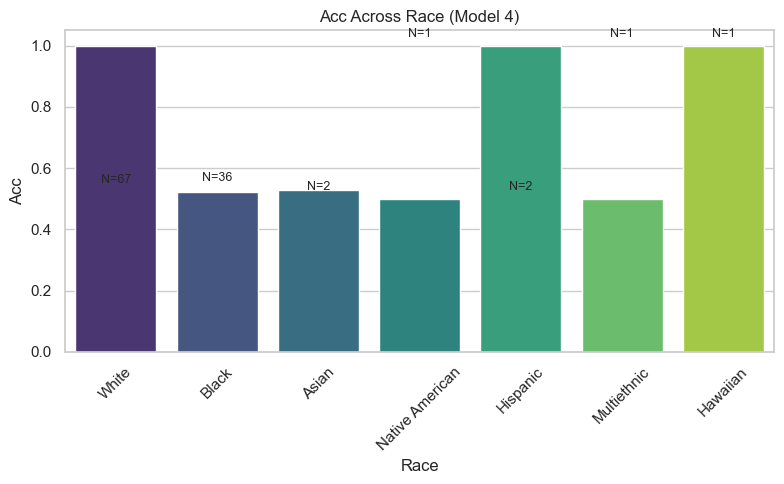

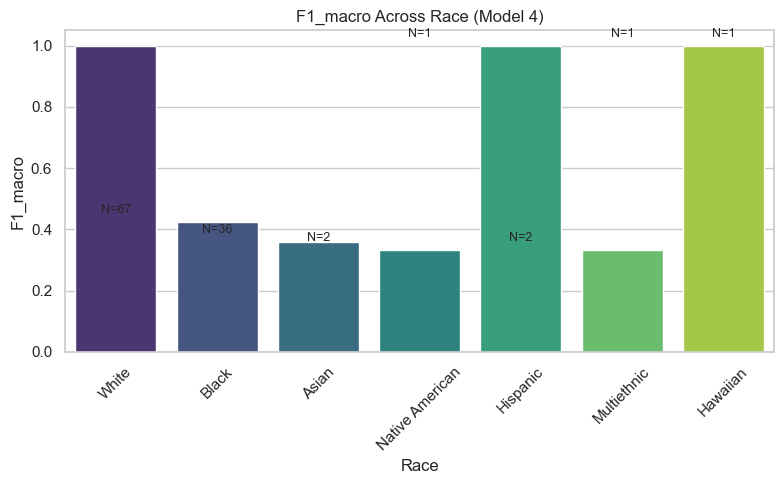

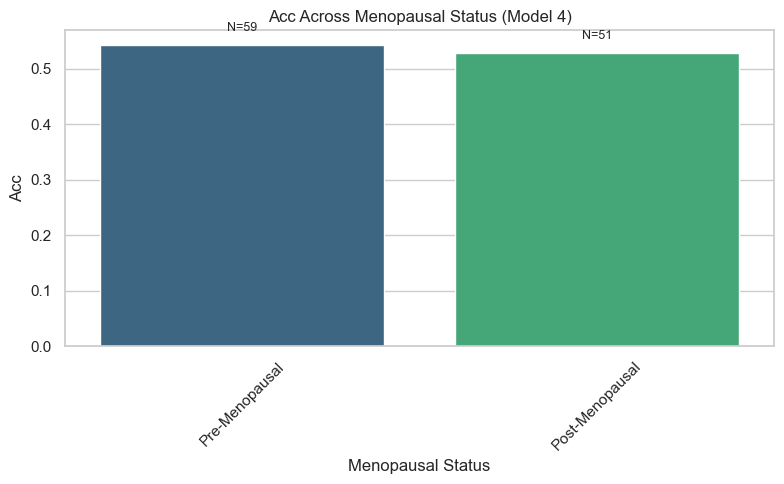

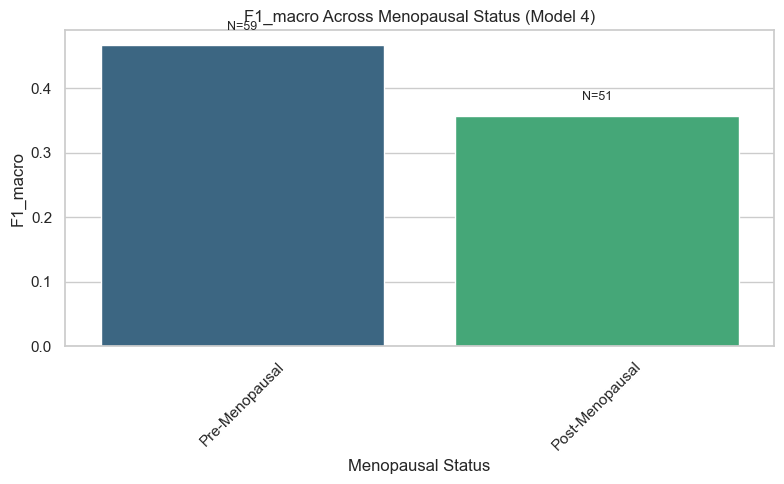

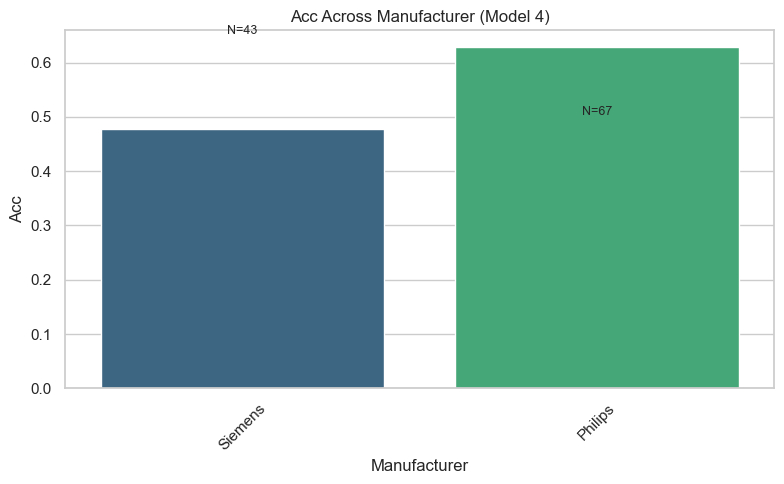

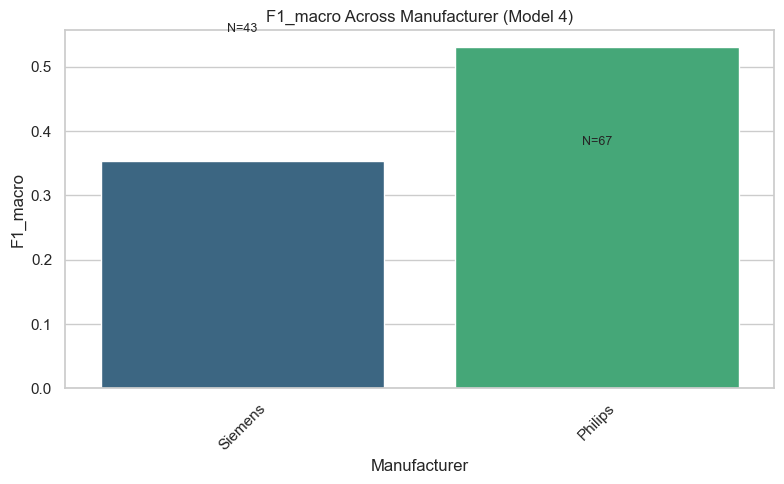

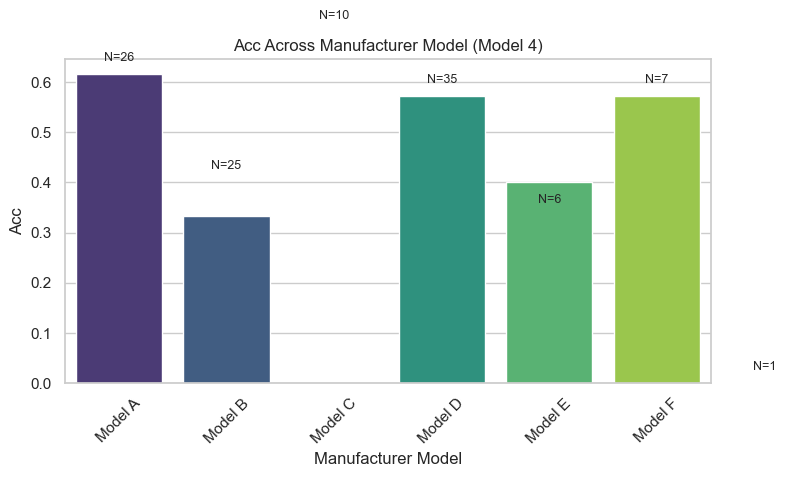

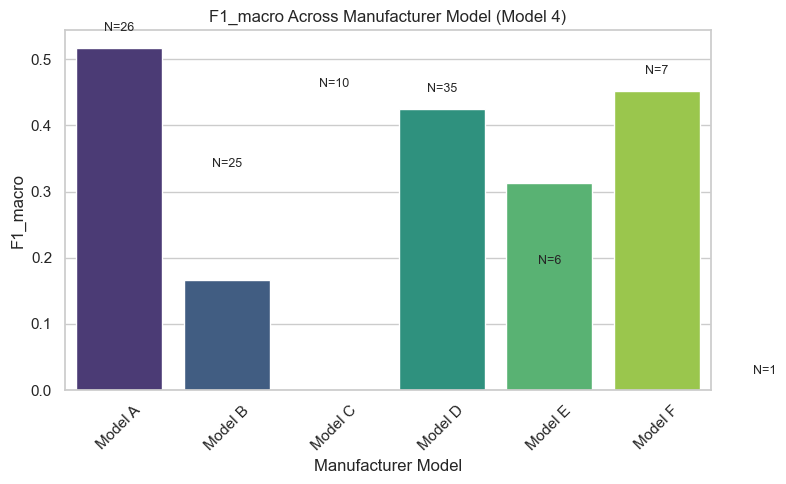

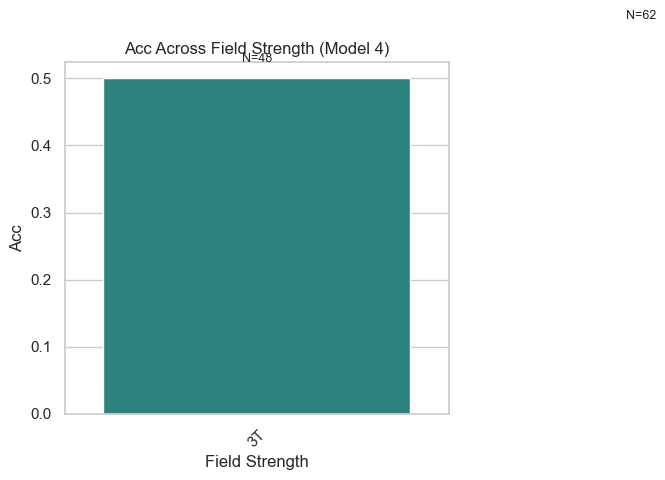

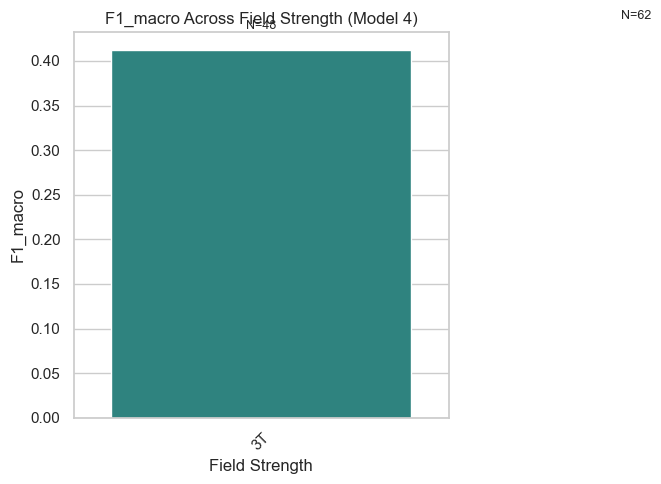

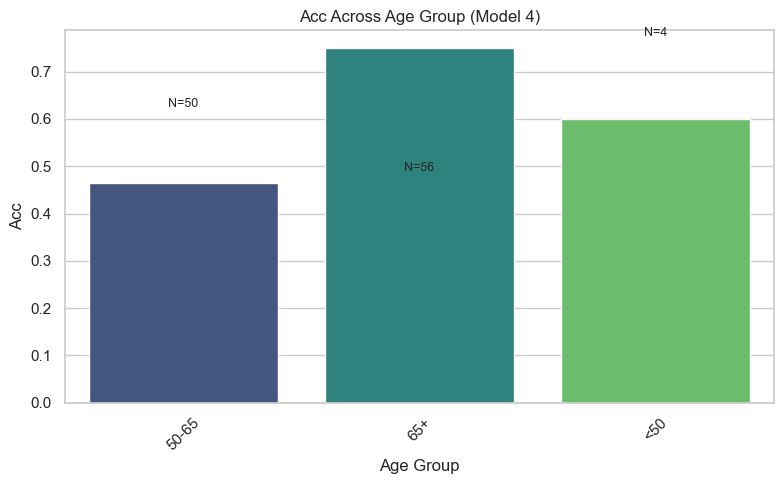

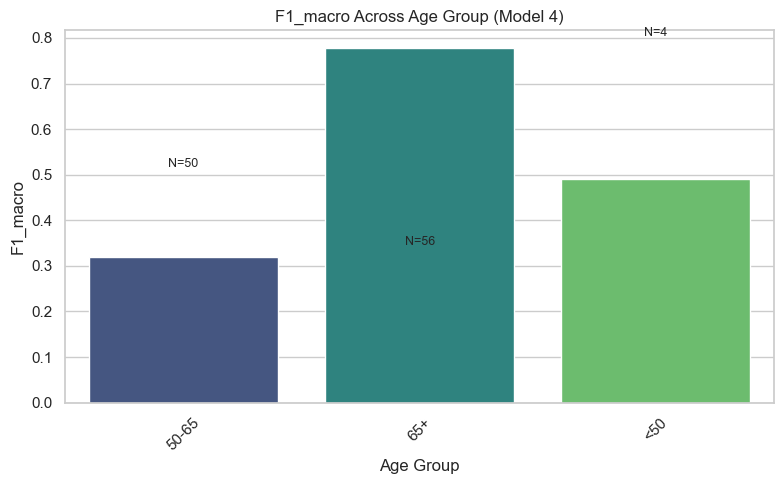

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for clarity
sns.set(style="whitegrid")

#  Define mapping dictionaries
race_mapping = {
    0: 'White',
    1: 'Black',
    2: 'Asian',
    3: 'Native American',
    4: 'Hispanic',
    5: 'Multiethnic',
    6: 'Hawaiian'
}

menopause_mapping = {
    0: 'Pre-Menopausal',
    1: 'Post-Menopausal'
}

manufacturer_mapping = {
    0: 'Siemens',
    1: 'GE',
    2: 'Philips'
}

# Add additional mappings if available in your data:
manufacturer_model_mapping = {
    0: 'Model A',
    1: 'Model B',
    2: 'Model C',
    3: 'Model D',
    4: 'Model E',
    5: 'Model F',
    6: 'Model G'
}

field_strength_mapping = {
    0: '1.5T',
    1: '3T'
}

age_group_mapping = {
    'Young': '<50',
    'Middle': '50-65',
    'Older': '65+'
}

# 2 Helper plotting function

def plot_fairness_metric(csv_path, group_col, mapping=None, metric_col='Accuracy', save_name='plot.png'):
    df = pd.read_csv(csv_path)
    df = df.sort_values(by='Group')

    if mapping:
        df['Group_Label'] = df['Group'].map(mapping)
    else:
        df['Group_Label'] = df['Group'].astype(str)

    plt.figure(figsize=(8, 5))
    ax = sns.barplot(x='Group_Label', y=metric_col, data=df, palette='viridis')
    for i, row in df.iterrows():
        ax.text(i, row[metric_col] + 0.02, f"N={row['N']}", ha='center', va='bottom', fontsize=9)
    plt.title(f"{metric_col} Across {group_col} (Model 4)")
    plt.xlabel(group_col)
    plt.ylabel(metric_col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(save_name, dpi=300)
    plt.show()

#  Generate plots

# Race
plot_fairness_metric(
    csv_path="../results_lgbm_tuned/metrics_Race.csv",
    group_col="Race",
    mapping=race_mapping,
    metric_col="Acc",
    save_name="../results_lgbm_tuned/Plots/race_accuracy.png"
)

plot_fairness_metric(
    csv_path="../results_lgbm_tuned/metrics_Race.csv",
    group_col="Race",
    mapping=race_mapping,
    metric_col="F1_macro",
    save_name="../results_lgbm_tuned/Plots/race_macro_f1.png"
)

# Menopausal Status
plot_fairness_metric(
    csv_path="../results_lgbm_tuned/metrics_Menopausal_Status.csv",
    group_col="Menopausal Status",
    mapping=menopause_mapping,
    metric_col="Acc",
    save_name="../results_lgbm_tuned/Plots/menopause_accuracy.png"
)

plot_fairness_metric(
    csv_path="../results_lgbm_tuned/metrics_Menopausal_Status.csv",
    group_col="Menopausal Status",
    mapping=menopause_mapping,
    metric_col="F1_macro",
    save_name="../results_lgbm_tuned/Plots/menopause_macro_f1.png"
)

# Manufacturer
plot_fairness_metric(
    csv_path="../results_lgbm_tuned/metrics_Manufacturer.csv",
    group_col="Manufacturer",
    mapping=manufacturer_mapping,
    metric_col="Acc",
    save_name="../results_lgbm_tuned/Plots/manufacturer_accuracy.png"
)

plot_fairness_metric(
    csv_path="../results_lgbm_tuned/metrics_Manufacturer.csv",
    group_col="Manufacturer",
    mapping=manufacturer_mapping,
    metric_col="F1_macro",
    save_name="../results_lgbm_tuned/Plots/manufacturer_macro_f1.png"
)

# Manufacturer Model
plot_fairness_metric(
    csv_path="../results_lgbm_tuned/metrics_Manufacturer_Model.csv",
    group_col="Manufacturer Model",
    mapping=manufacturer_model_mapping,
    metric_col="Acc",
    save_name="../results_lgbm_tuned/Plots/manufacturer_model_accuracy.png"
)

plot_fairness_metric(
    csv_path="../results_lgbm_tuned/metrics_Manufacturer_Model.csv",
    group_col="Manufacturer Model",
    mapping=manufacturer_model_mapping,
    metric_col="F1_macro",
    save_name="../results_lgbm_tuned/Plots/manufacturer_model_macro_f1.png"
)

# Field Strength
plot_fairness_metric(
    csv_path="../results_lgbm_tuned/metrics_Field_Strength.csv",
    group_col="Field Strength",
    mapping=field_strength_mapping,
    metric_col="Acc",
    save_name="../results_lgbm_tuned/Plots/field_strength_accuracy.png"
)

plot_fairness_metric(
    csv_path="../results_lgbm_tuned/metrics_Field_Strength.csv",
    group_col="Field Strength",
    mapping=field_strength_mapping,
    metric_col="F1_macro",
    save_name="../results_lgbm_tuned/Plots/field_strength_macro_f1.png"
)

# Age Group
plot_fairness_metric(
    csv_path="../results_lgbm_tuned/metrics_Age_Group.csv",
    group_col="Age Group",
    mapping=age_group_mapping,
    metric_col="Acc",
    save_name="../results_lgbm_tuned/Plots/age_group_accuracy.png"
)

plot_fairness_metric(
    csv_path="../results_lgbm_tuned/metrics_Age_Group.csv",
    group_col="Age Group",
    mapping=age_group_mapping,
    metric_col="F1_macro",
    save_name="../results_lgbm_tuned/Plots/age_group_macro_f1.png"
)



In [153]:
#  exported SHAP feature importance to CSV (Top-10 + Full).
shap_importance.to_csv("../results_lgbm_tuned/shap_feature_importance_full.csv", index=False)
shap_importance.head(10).to_csv("../results_lgbm_tuned/shap_feature_importance_top10.csv", index=False)
